In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Audio
import librosa
import torch
from pathlib import Path
from Models.vae import VAE,VAE2D,VAEDeep,VAEDeeper
from datasets import SpectrogramDataset
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

In [2]:
file_path = Path("/net/projects/scratch/summer/valid_until_31_January_2024/ybrima/data/learning/SyncSpeech/dataset_16k.npz")
# Load data
data = np.load(file_path, allow_pickle=True)
x = data['x']
y = data['y']
metadata = data['metadata'].tolist()
CLASSES = data['classes']

In [3]:
# # Split data
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# Create datasets
train_dataset = SpectrogramDataset(x_train, y_train)
val_dataset = SpectrogramDataset(x_val, y_val)

In [39]:
# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)
# Train 50 models
num_models = 1

latent_dim = 16

In [104]:
# Get input shape 
x_batch,x_spec_batch, y_batch = next(iter(train_loader))
input_shape = x_spec_batch.shape


model = VAEDeeper(latent_dim,input_shape)

x_hat, z_mean, z_logvar = model(x_spec_batch)

print("Shape of x_hat:", x_hat.shape)

Shape of x_hat: torch.Size([64, 1, 128, 32])


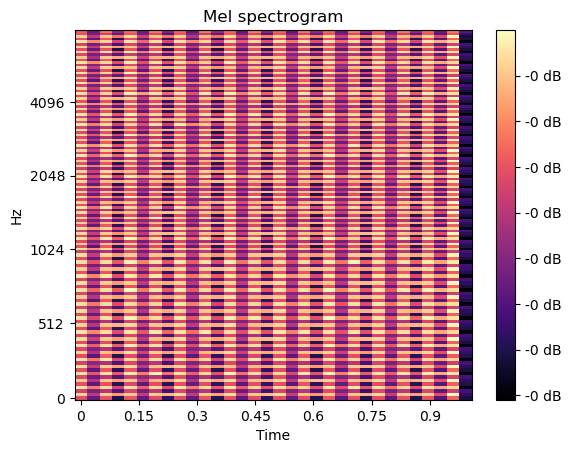

In [41]:
sr = 16000
hop_length = 512
# Display the Mel spectrogram
idx =  np.random.randint(0, x_hat.shape[0])
librosa.display.specshow(librosa.power_to_db(x_hat[idx].squeeze().detach().numpy(), ref=np.max),y_axis='mel', x_axis='time', sr = sr, hop_length=hop_length)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.show()

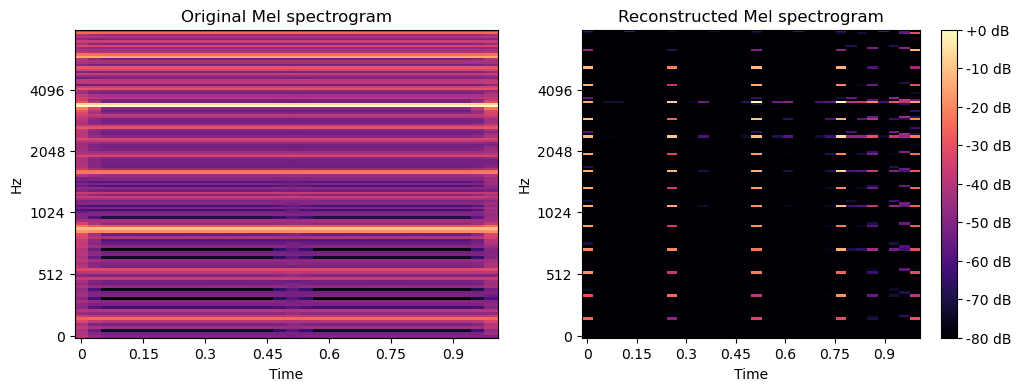

In [105]:
device = "cuda" if torch.cuda.is_available() else "cpu"
vae = VAEDeeper(latent_dim, input_shape).to(device)
state_dict = torch.load('./Exports/vae2deeper.pth')

# Load state dict
vae.load_state_dict(state_dict)

with torch.inference_mode():
  x_hat, z_mean, z_logvar = vae(x_spec_batch.to(device))


idx =  np.random.randint(0, x_hat.shape[0])
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
librosa.display.specshow(librosa.power_to_db(x_spec_batch[idx].squeeze().detach().cpu().numpy(), ref=np.max),y_axis='mel', x_axis='time', sr = sr, hop_length=hop_length)
plt.title('Original Mel spectrogram')
plt.subplot(1,2,2)
# Display the Mel spectrogram
librosa.display.specshow(librosa.power_to_db(x_hat[idx].squeeze().detach().cpu().numpy(), ref=np.max),y_axis='mel', x_axis='time', sr = sr, hop_length=hop_length)
plt.colorbar(format='%+2.0f dB')
plt.title('Reconstructed Mel spectrogram')
plt.show()

In [43]:
mel_spec = x_hat[idx].squeeze().detach().cpu().numpy()
waveform = librosa.feature.inverse.mel_to_audio(mel_spec, sr=sr, n_fft=2048, hop_length=512, n_iter=512)
Audio(waveform, rate=sr)

In [44]:
Audio(x_batch[idx].squeeze().detach().cpu().numpy(), rate=sr)

In [10]:
# Assuming vae is your trained VAE model and latent_dim is the dimension of the latent space
# Generate random samples from the latent space
num_samples = 100  # Number of sounds to generate
latent_samples = torch.randn(num_samples, latent_dim).to(device)  # Generate random samples

# Decode the latent samples to generate new sounds
with torch.no_grad():
    vae.eval()
    generated_mel_spectrograms = vae.decode(latent_samples)  # Decode the latent samples



In [11]:
idxs =  np.random.randint(len(generated_mel_spectrograms))
mel_spec = generated_mel_spectrograms[idxs].squeeze().detach().cpu().numpy()
waveform = librosa.feature.inverse.mel_to_audio(mel_spec, sr=sr, n_fft=2048, hop_length=512, n_iter=512)

Audio(waveform, rate=sr)

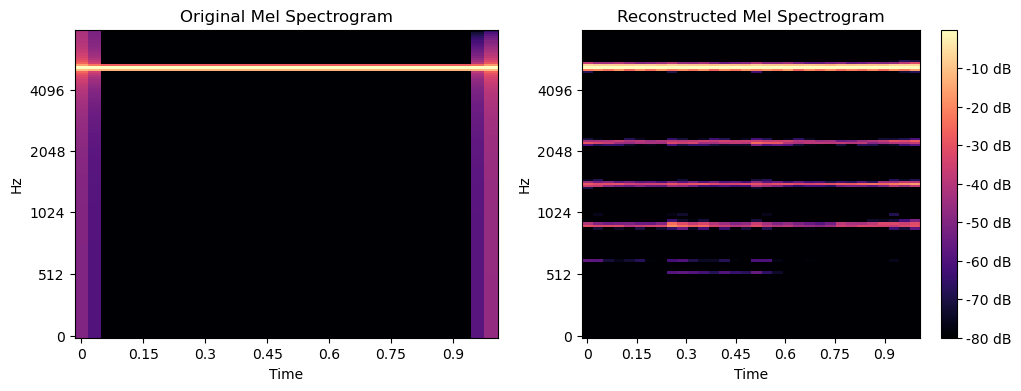

In [100]:
device = "cuda" if torch.cuda.is_available() else "cpu"
vae = VAEDeep(latent_dim, input_shape).to(device)
state_dict = torch.load('./Exports/vae2deep.pth')

# Load state dict
vae.load_state_dict(state_dict)

with torch.inference_mode():
  x_hat, z_mean, z_logvar = vae(x_spec_batch.to(device))


idx =  np.random.randint(0, x_hat.shape[0])
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
librosa.display.specshow(librosa.power_to_db(x_spec_batch[idx].squeeze().detach().cpu().numpy(), ref=np.max),y_axis='mel', x_axis='time', sr = sr, hop_length=hop_length)
plt.title('Original Mel Spectrogram')
plt.subplot(1,2,2)
# Display the Mel spectrogram

librosa.display.specshow(librosa.power_to_db(x_hat[idx].squeeze().detach().cpu().numpy(), ref=np.max),y_axis='mel', x_axis='time', sr = sr, hop_length=hop_length)
plt.colorbar(format='%+2.0f dB')
plt.title('Reconstructed Mel Spectrogram')
plt.show()

In [101]:
mel_spec = x_hat[idx].squeeze().detach().cpu().numpy()
waveform = librosa.feature.inverse.mel_to_audio(mel_spec, sr=sr, n_fft=2048, hop_length=512, n_iter=512)
Audio(waveform, rate=sr)

In [102]:
Audio(x_batch[idx].squeeze().detach().cpu().numpy(), rate=sr)

In [96]:
# Assuming vae is your trained VAE model and latent_dim is the dimension of the latent space
# Generate random samples from the latent space
num_samples = 100  # Number of sounds to generate
latent_samples = torch.randn(num_samples, latent_dim).to(device)  # Generate random samples

# Decode the latent samples to generate new sounds
with torch.no_grad():
    vae.eval()
    generated_mel_spectrograms = vae.decode(latent_samples)  # Decode the latent samples

In [99]:
idx =  np.random.randint(len(generated_mel_spectrograms))
mel_spec = generated_mel_spectrograms[idx].squeeze().detach().cpu().numpy()
waveform = librosa.feature.inverse.mel_to_audio(mel_spec, sr=sr, n_fft=2048, hop_length=512, n_iter=512)

Audio(waveform, rate=sr)

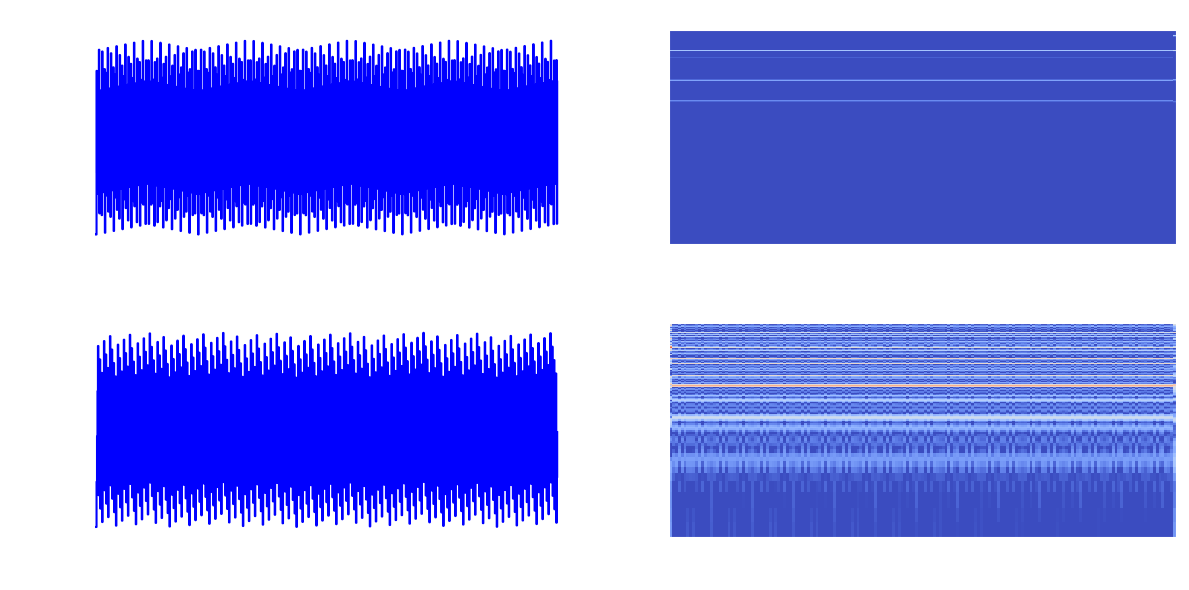

In [104]:
x_batch,spec_batch, y_batch = next(iter(train_loader))
n = 2
idx = np.random.randint(len(x_batch), size=n)
# Plot
fig, axs = plt.subplots(n, 2, figsize=(12,6))
# fig.patch.set_facecolor('none') 
for i in range(n):
  # Waveform 
  librosa.display.waveshow(x_batch[idx[i]].squeeze().detach().cpu().numpy()[:1000], sr=sr, color='b', ax=axs[i, 0])
  # axs[i, 0].plot(x_batch[i].squeeze().detach().cpu().numpy())
  axs[i, 0].set_title(f'{CLASSES[y_batch[idx[i]]].capitalize() }')
  axs[i, 0].set_xlabel('Time')
  axs[i, 0].set_ylabel('Amplitude')

  # Spectrogram
  # axs[i, 1].imshow(librosa.power_to_db(spec_batch[idx[i]].squeeze().detach().cpu().numpy()), origin="lower", aspect="auto", interpolation="nearest")
  librosa.display.specshow(librosa.amplitude_to_db(spec_batch[idx[i]].squeeze().detach().cpu().numpy()),win_length=512, sr=sr, x_axis='time', y_axis='log', ax=axs[i, 1])
  axs[i, 1].set_title(f'{CLASSES[y_batch[idx[i]]].capitalize() }')
  axs[i, 1].set_xlabel('Time')
  axs[i, 1].set_ylabel('Frequency')
plt.tight_layout()
# save the figure
plt.savefig('./Figures/Samples2.png', dpi=300, transparent=True)
plt.show()

torch.Size([1, 1, 512, 172])